차트 시각화, 시계열 분해, 자기상관 분석 내용을 담고있습니다.

상세내용 : https://songseungwon.tistory.com/128

# 차트 시각화

In [2]:
%cd /home/alpaco/mys/projects/news/yfinance

/home/alpaco/mys/projects/news


In [3]:
!ls

01.ipynb  02.ipynb  03.ipynb  yfinance


In [4]:
import pandas as pd
import yfinance as yf

In [8]:
tsla = yf.Ticker('TSLA')
df = tsla.history(period="max")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-20 00:00:00-04:00,184.679993,185.210007,179.660004,181.570007,55893100,0.0,0.0
2024-06-21 00:00:00-04:00,182.300003,183.949997,180.690002,183.009995,63029500,0.0,0.0
2024-06-24 00:00:00-04:00,184.970001,188.800003,182.550003,182.580002,61992100,0.0,0.0


In [9]:
df['Close']

Date
2010-06-29 00:00:00-04:00      1.592667
2010-06-30 00:00:00-04:00      1.588667
2010-07-01 00:00:00-04:00      1.464000
2010-07-02 00:00:00-04:00      1.280000
2010-07-06 00:00:00-04:00      1.074000
                                ...    
2024-06-20 00:00:00-04:00    181.570007
2024-06-21 00:00:00-04:00    183.009995
2024-06-24 00:00:00-04:00    182.580002
2024-06-25 00:00:00-04:00    187.350006
2024-06-26 00:00:00-04:00    194.910004
Name: Close, Length: 3522, dtype: float64

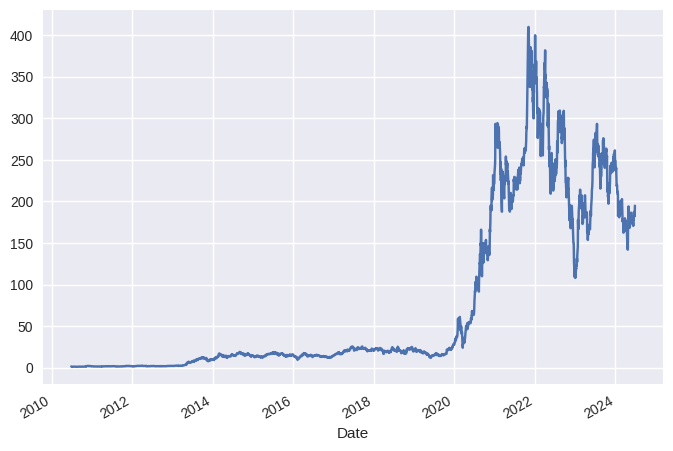

In [10]:
# pip install matplotlib
import matplotlib.pyplot as plt

# 스타일링
plt.style.use('seaborn')

df['Close'].plot() #차트로 만들어라
plt.show()  #차트를 보여줘라

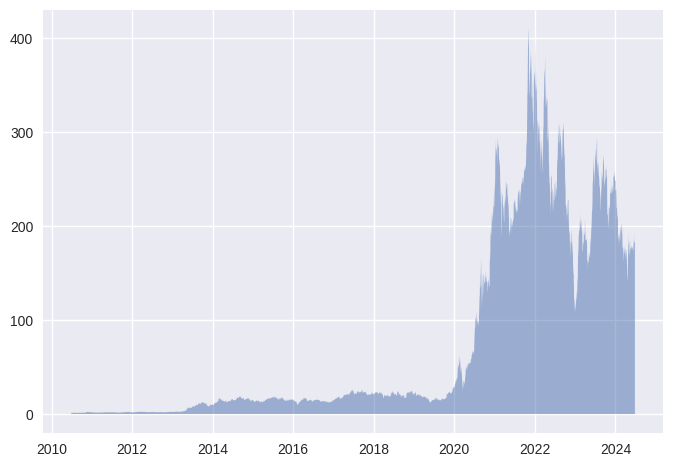

In [11]:
plt.fill_between(x=df.index, y1=df['Close'], alpha=0.5) #색 채우기

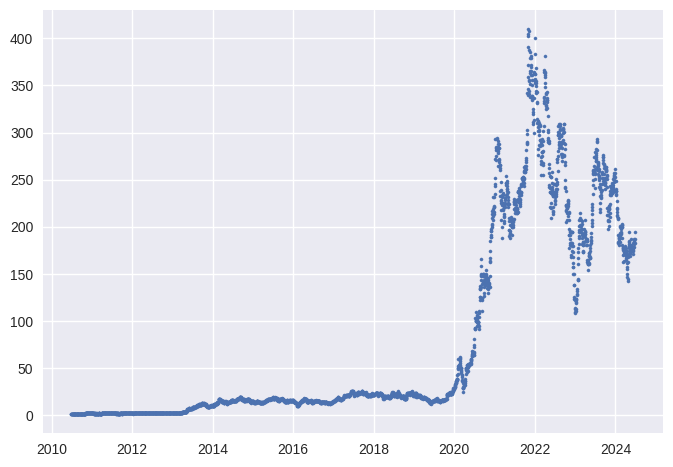

In [12]:
# 산점도
plt.scatter(x=df.index, y=df['Close'], s=5) # 점 크기 조절

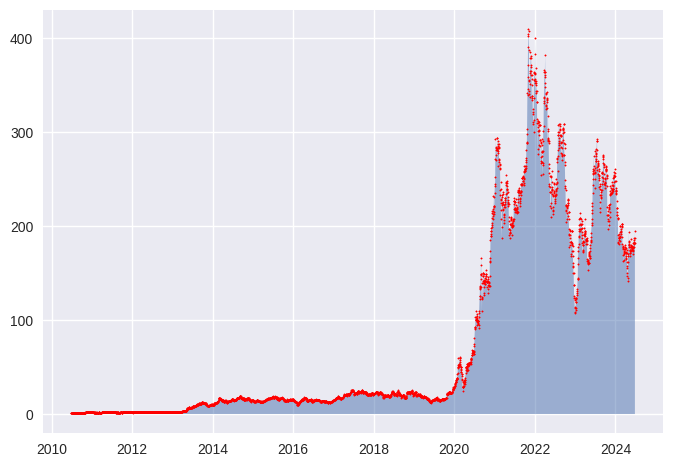

In [13]:
plt.fill_between(x=df.index, y1=df['Close'], alpha=0.5)
plt.scatter(x=df.index, y=df['Close'], s=1, c='r') # 점 크기 조절
plt.show()

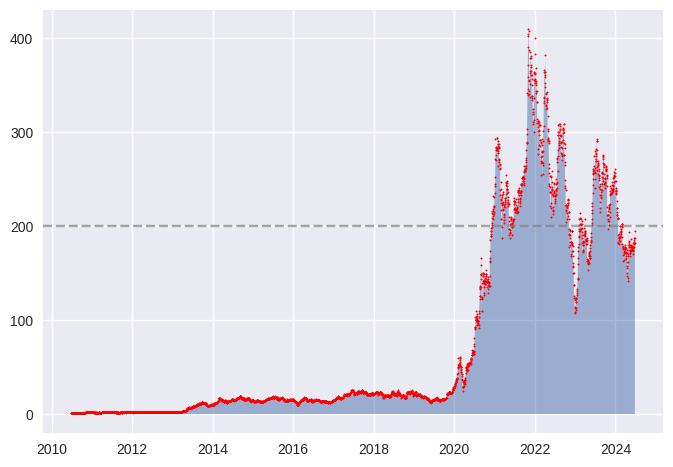

In [14]:
plt.fill_between(x=df.index, y1=df['Close'], alpha=0.5)
plt.scatter(x=df.index, y=df['Close'], s=1, c='r') # 점 크기 조절
plt.axhline(y=200, c='gray', linestyle='--', alpha=0.7)
plt.show()

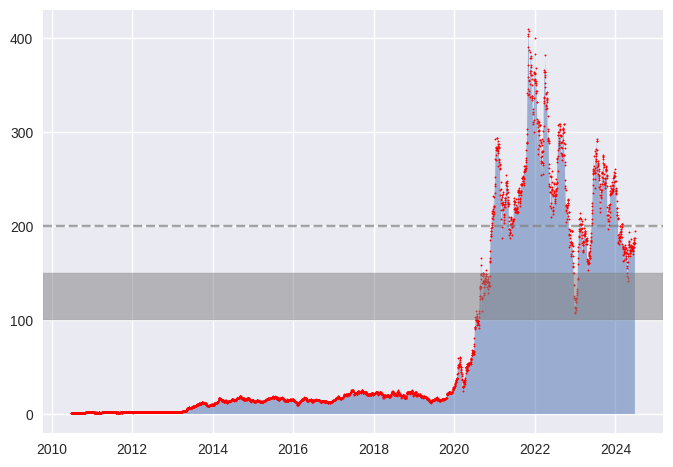

In [15]:
plt.fill_between(x=df.index, y1=df['Close'], alpha=0.5)
plt.scatter(x=df.index, y=df['Close'], s=1, c='r') # 점 크기 조절
plt.axhline(y=200, c='gray', linestyle='--', alpha=0.7)
plt.axhspan(ymin=100, ymax=150, color='gray', alpha=0.5)
plt.show()

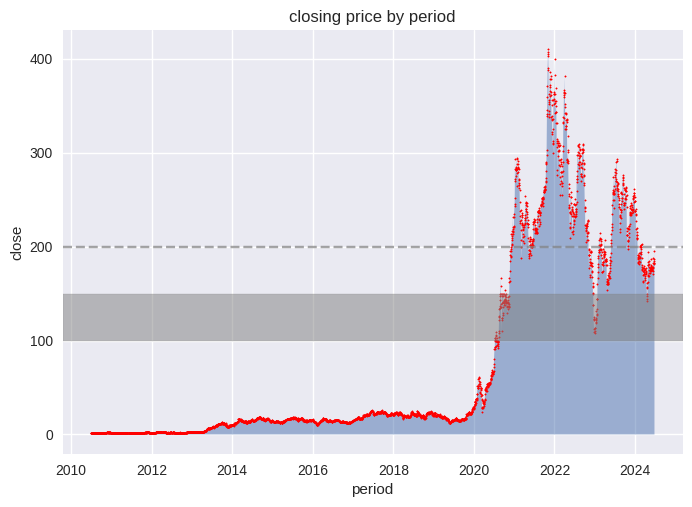

In [16]:
plt.fill_between(x=df.index, y1=df['Close'], alpha=0.5) #그래프 채우기
plt.scatter(x=df.index, y=df['Close'], s=1, c='r') # 점 크기 조절
plt.axhline(y=200, c='gray', linestyle='--', alpha=0.7) # 구간 점선
plt.axhspan(ymin=100, ymax=150, color='gray', alpha=0.5) #구간 채우기
plt.xlabel('period')
plt.ylabel('close')
plt.title('closing price by period')
plt.show()

In [17]:
# n일 이동 평균
df['Close'].rolling(3).mean()

Date
2010-06-29 00:00:00-04:00           NaN
2010-06-30 00:00:00-04:00           NaN
2010-07-01 00:00:00-04:00      1.548445
2010-07-02 00:00:00-04:00      1.444222
2010-07-06 00:00:00-04:00      1.272667
                                ...    
2024-06-20 00:00:00-04:00    184.623337
2024-06-21 00:00:00-04:00    183.146667
2024-06-24 00:00:00-04:00    182.386668
2024-06-25 00:00:00-04:00    184.313334
2024-06-26 00:00:00-04:00    188.280004
Name: Close, Length: 3522, dtype: float64

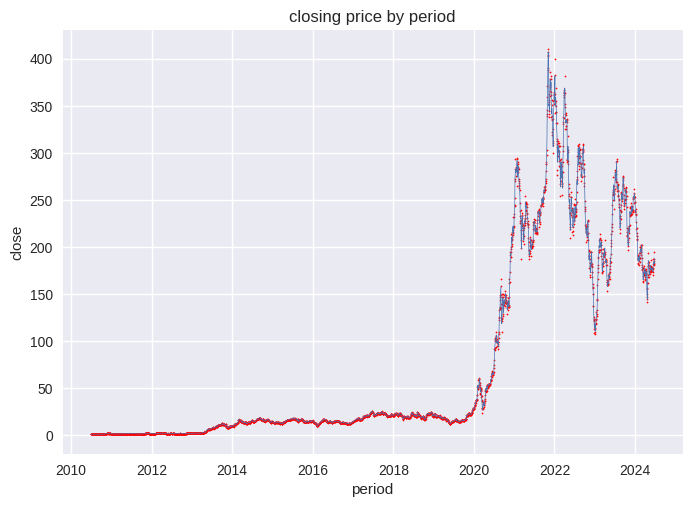

In [18]:
plt.scatter(x=df.index, y=df['Close'], s=0.8, c='r')
plt.plot(df['Close'].rolling(3).mean(), linewidth=0.5)

plt.xlabel('period')
plt.ylabel('close')
plt.title('closing price by period')
plt.show()

Text(0.5, 1.0, 'closing price by period')

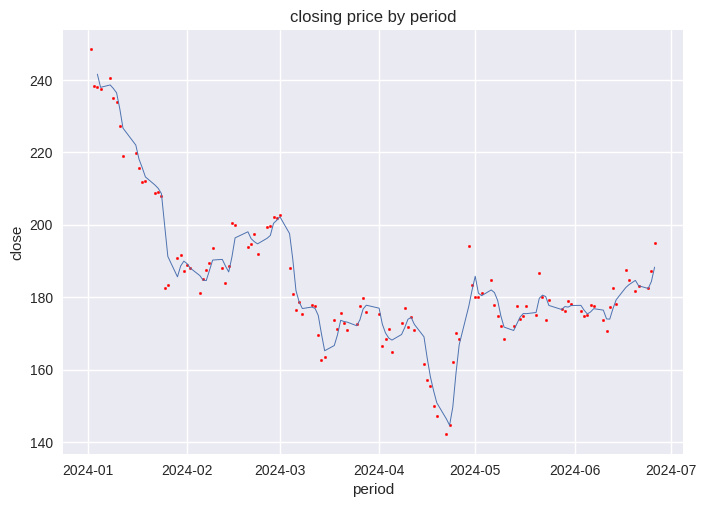

In [20]:
# 버전변경 무시
import warnings
warnings.filterwarnings(action='ignore')
import datetime

today = datetime.date.today()

# 2024년 데이터만 필터링
df_2024 = df.loc['2024-01-01':today.strftime('%Y-%m-%d')].copy()
plt.scatter(x=df_2024.index, y=df_2024['Close'], s=3, c='r')

# 이동 평균선
plt.plot(df_2024['Close'].rolling(3).mean(), linewidth=0.7)

plt.xlabel('period')
plt.ylabel('close')
plt.title('closing price by period')

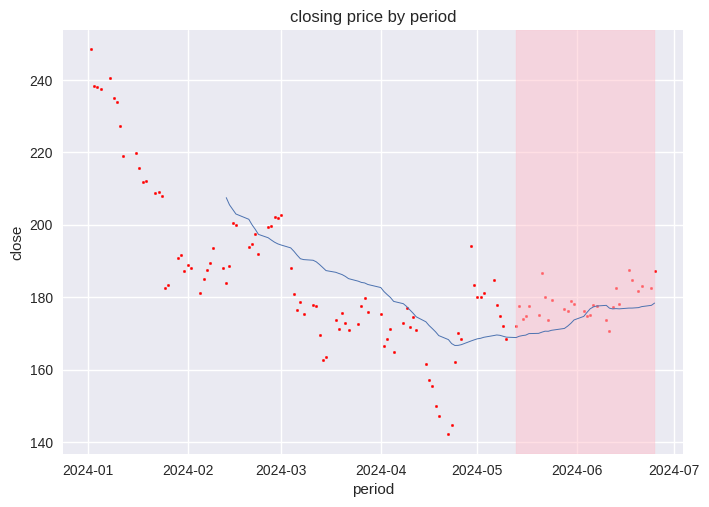

In [ ]:
# 버전변경 무시
import warnings
warnings.filterwarnings(action='ignore')

# 2024년 데이터만 필터링
df_2024 = df.loc['2024-01-01':today.strftime('%Y-%m-%d')].copy()
plt.scatter(x=df_2024.index, y=df_2024['Close'], s=3, c='r')

# 이동 평균선
plt.plot(df_2024['Close'].rolling(30).mean(), linewidth=0.7)
plt.axvspan(xmin=df_2024.index[-30], xmax=df_2024.index[-1], color='pink', alpha=0.5)

plt.xlabel('period')
plt.ylabel('close')
plt.title('closing price by period')
plt.show()

# 시계열 분해

## 장기 주가 데이터

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose # type: ignore


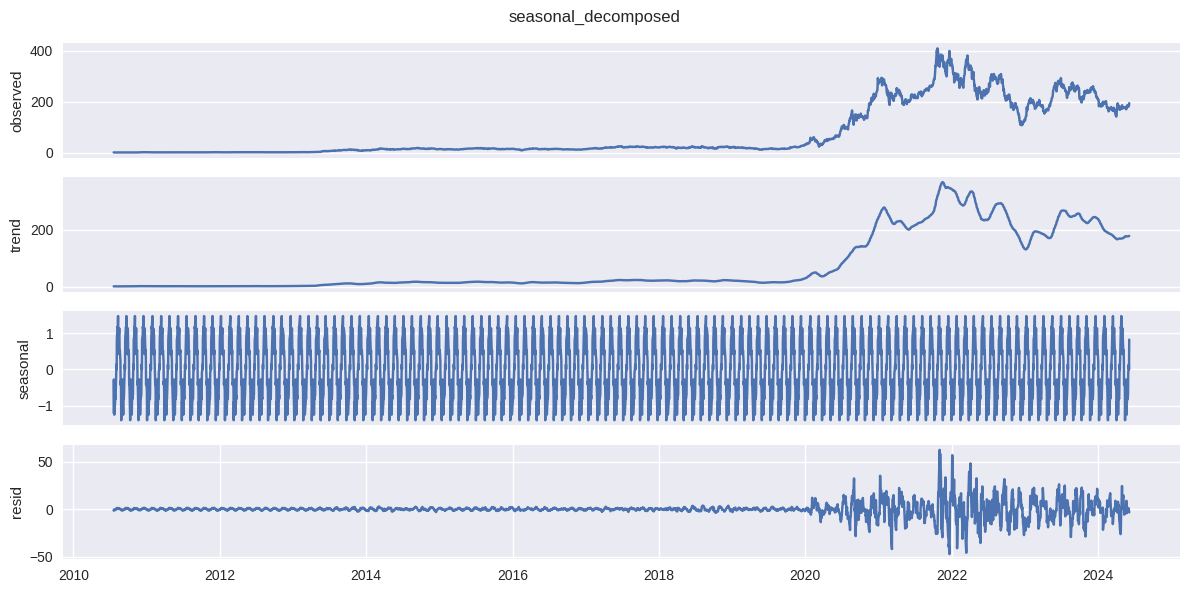

In [55]:
# 데이터 프레임의 인덱스를 날짜 형식으로 변경
df.index = pd.to_datetime(df.index)

res = seasonal_decompose(df['Close'], period=30) # 데이터 30일 주기 설정

plt.figure(figsize=(12,6))

plt.subplot(411)
plt.xticks([])
plt.ylabel('observed') # 관측치,주가
plt.plot(res.observed)

plt.subplot(412)
plt.ylabel('trend') # 추세
plt.xticks([])
plt.plot(res.trend)

plt.subplot(413)
plt.ylabel('seasonal') # 계절성
plt.xticks([])
plt.plot(res.seasonal)

plt.subplot(414)
plt.ylabel('resid') # 잔차 residual, resid
plt.plot(res.resid)

plt.suptitle('seasonal_decomposed')
plt.tight_layout()
plt.show()


## 단기 주가 데이터

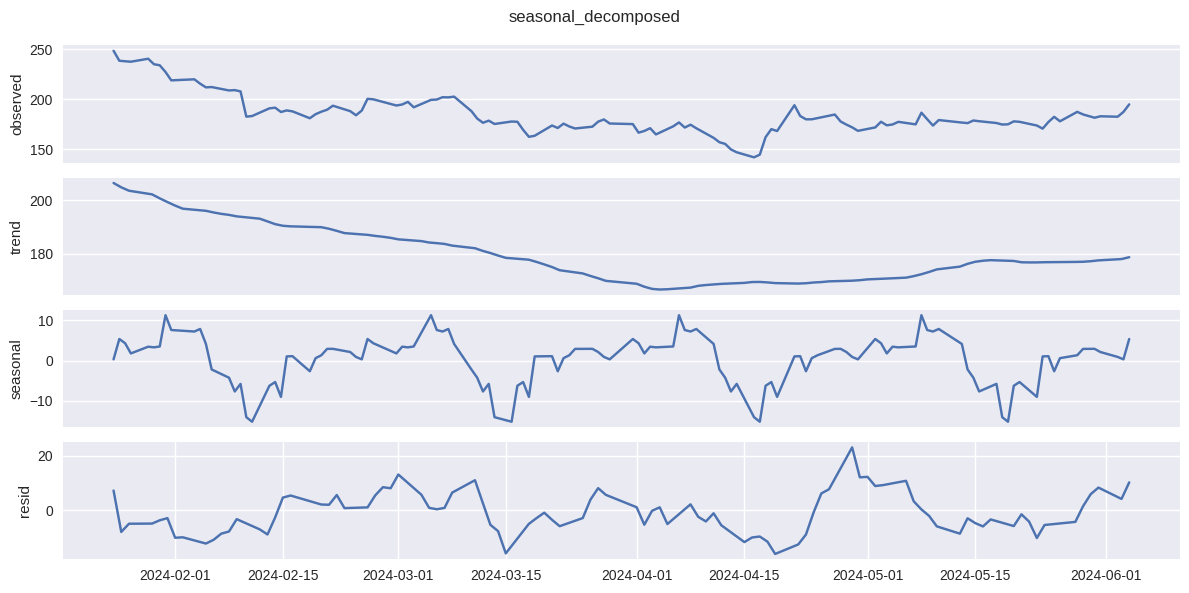

In [56]:
res = seasonal_decompose(df_2024['Close'], period=30)


plt.figure(figsize=(12,6))

plt.subplot(411)
plt.xticks([])
plt.ylabel('observed') # 관측치,주가
plt.plot(res.observed)

plt.subplot(412)
plt.ylabel('trend') # 추세
plt.xticks([])
plt.plot(res.trend)

plt.subplot(413)
plt.ylabel('seasonal') # 계절성
plt.xticks([])
plt.plot(res.seasonal)

plt.subplot(414)
plt.ylabel('resid') # 잔차 residual, resid
plt.plot(res.resid)

plt.suptitle('seasonal_decomposed')
plt.tight_layout()
plt.show()

## 장기 로그-주가 데이터

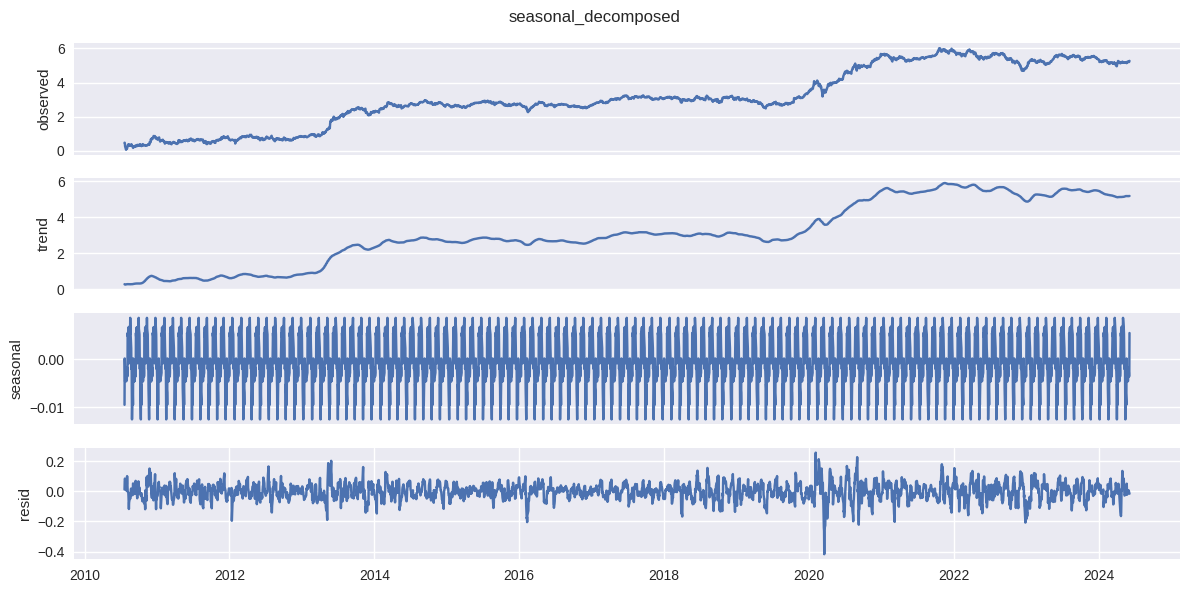

In [58]:
import numpy as np
res = seasonal_decompose(np.log(df['Close']), period=30)


plt.figure(figsize=(12,6))

plt.subplot(411)
plt.xticks([])
plt.ylabel('observed') # 관측치,주가
plt.plot(res.observed)

plt.subplot(412)
plt.ylabel('trend') # 추세
plt.xticks([])
plt.plot(res.trend)

plt.subplot(413)
plt.ylabel('seasonal') # 계절성
plt.xticks([])
plt.plot(res.seasonal)

plt.subplot(414)
plt.ylabel('resid') # 잔차 residual, resid
plt.plot(res.resid)

plt.suptitle('seasonal_decomposed')
plt.tight_layout()
plt.show()

## 장기 로그차분-주가 데이터 (차분 = 미분 = 변화)

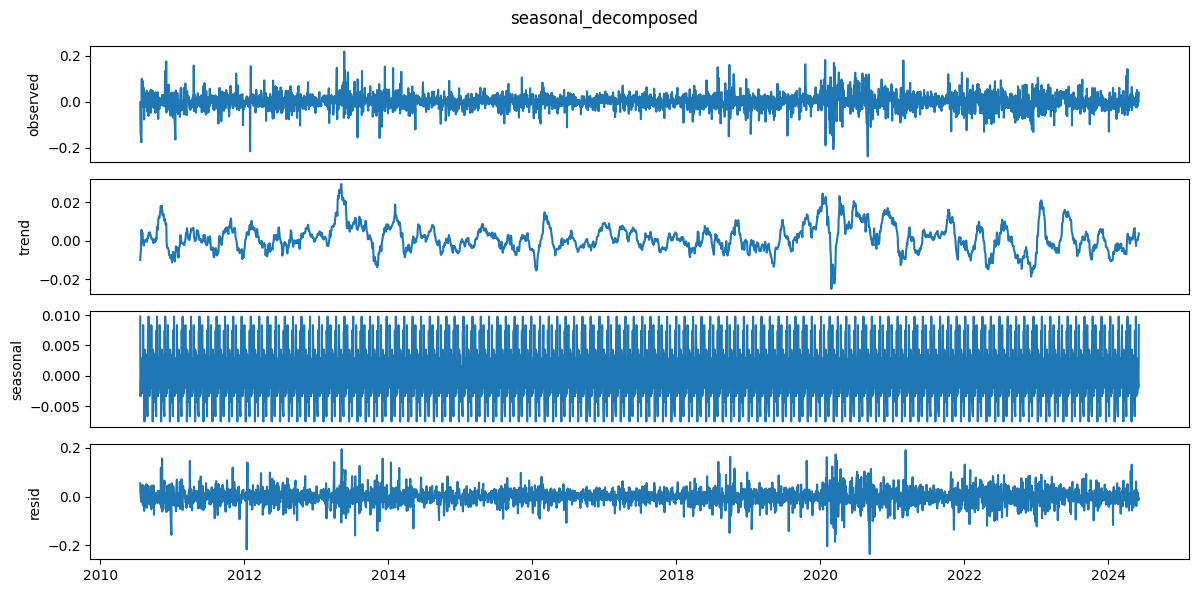

In [64]:
import numpy as np
res = seasonal_decompose(np.log(df['Close']).diff().dropna(), period=30)


plt.figure(figsize=(12,6))

plt.subplot(411)
plt.xticks([])
plt.ylabel('observed') # 관측치,주가
plt.plot(res.observed)

plt.subplot(412)
plt.ylabel('trend') # 추세
plt.xticks([])
plt.plot(res.trend)

plt.subplot(413)
plt.ylabel('seasonal') # 계절성
plt.xticks([])
plt.plot(res.seasonal)

plt.subplot(414)
plt.ylabel('resid') # 잔차 residual, resid
plt.plot(res.resid)

plt.suptitle('seasonal_decomposed')
plt.tight_layout()
plt.show()

# 자기 상관 분석

## 자기 기본 종가 데이터

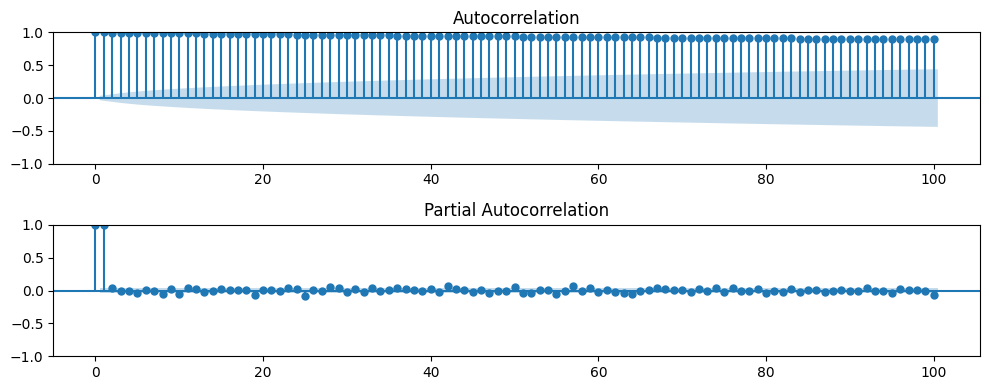

In [79]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.style.use('default')

fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(211)
plot_acf(df['Close'], lags=100, ax=ax1) # 오늘과 어제 1개 단위로 상관성.

ax2 = fig.add_subplot(212)
plot_pacf(df['Close'], lags=100, ax=ax2) # 오늘~n일 단위의 상관성
plt.tight_layout()

# 1에 가까울수록 상관성이 크다.

## 자기 종가 로그 데이터

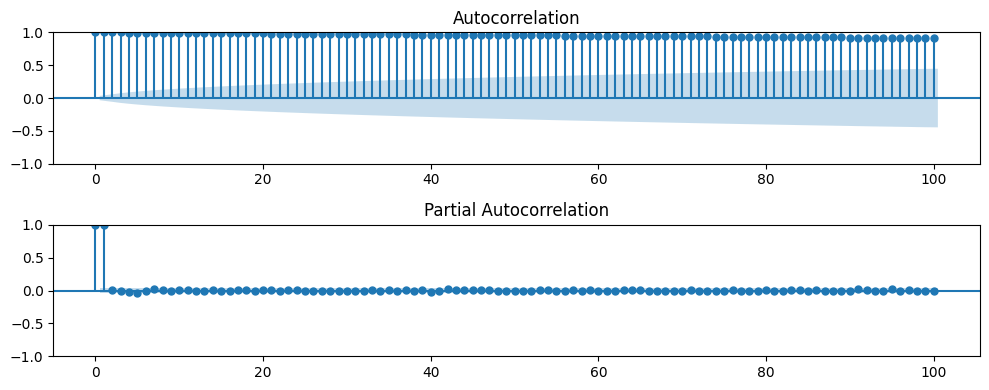

In [82]:
fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(211)
plot_acf(np.log(df['Close']), lags=100, ax=ax1) # 오늘과 어제 1개 단위로 상관성.

ax2 = fig.add_subplot(212)
plot_pacf(np.log(df['Close']), lags=100, ax=ax2) # 오늘~n일 단위의 상관성
plt.tight_layout()

## 자기 차분 종가 데이터

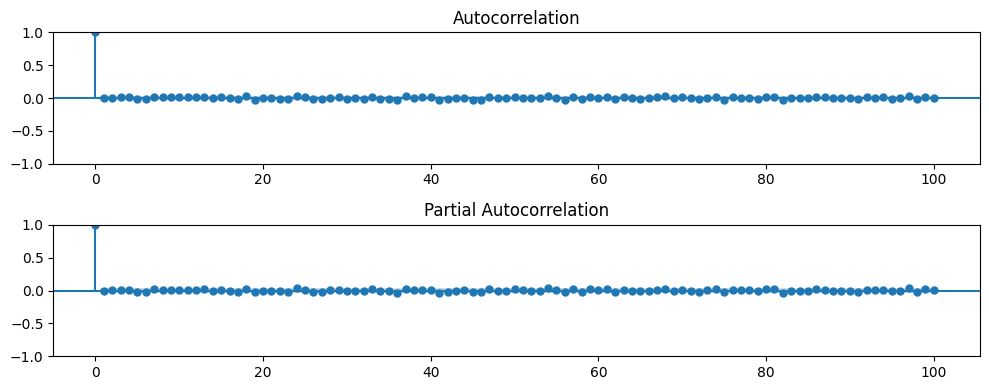

In [87]:
fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(211)
plot_acf(np.log(df['Close']).diff().dropna(), lags=100, ax=ax1) # 오늘과 어제 1개 단위로 상관성.

ax2 = fig.add_subplot(212)
plot_pacf(np.log(df['Close']).diff().dropna(), lags=100, ax=ax2) # 오늘~n일 단위의 상관성
plt.tight_layout()

결론 어제의 가격 변화로 내일의 가격 변화를 맞출 수 없다.